# Домашняя работа "ЦПТ своими руками"
## Выбранное распределение - экспоненциальное
https://en.wikipedia.org/wiki/Exponential_distribution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, norm
%matplotlib inline

Определим функцию подсчета среднего числа.

In [2]:
def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

Введем параметр распределения экспоненциальной функции - лямбда.

In [3]:
lmbd = 0.3

Строим гистограмму выборки (объема 1000) и поверх неё теоретическую плотность экспоненциального распределения

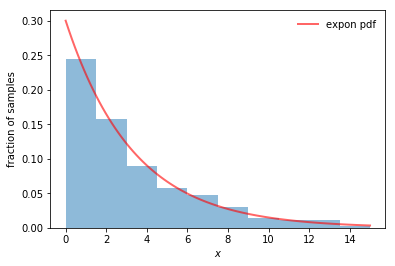

In [4]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 15, 100)
pdf1 = lmbd * np.exp(-lmbd * x) #Формула подсчета pdf
ax.plot(x, pdf1, 'r-', lw=2, alpha=0.6, label='expon pdf') #Рисуем график pdf

r = expon.rvs(size=1000, scale = lmbd**-1) 
ax.hist(r, density=True, histtype='stepfilled', alpha=0.5, range=(0, 15)) #Рисуем гистограмму
ax.legend(loc='best', frameon=False)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.show()

Генерируем 1000 выборок при значении n = 10. Определяем значения параметров нормальных распределений. Тут же строим полученную гистограмму и соответствующее нормальное распределение.
Т.к. экспоненциальное распределение - асиметричное, ограниченное с одного бока распределение, тут может быть некоторое смещение. Однако, с ростом n оно как правило уменьшается.

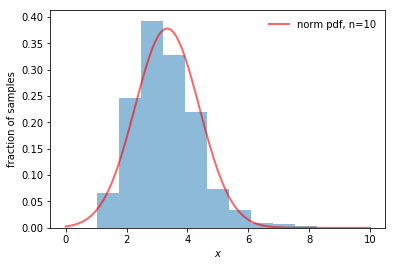

In [5]:
n = 10
lst = [] # В этот пустой список будут записываться средние значения по n выборкам
for _ in range(1000):
    r1 = expon.rvs(size=n, scale = lmbd**-1)
    m = mean(r1)
    lst.append(m)

# Используя информацию о среднем и дисперсии экспоненциального распределения, 
# определяем значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, 
# приближается распределение выборочных средних

std = np.sqrt((lmbd**-2)/n) 
norm_mean = lmbd**-1 

x = np.linspace(0, 10, 100)
norm_rv = norm(norm_mean, std)
plt.plot(x, norm_rv.pdf(x),'r-', lw=2, alpha=0.6, label='norm pdf, n=10')

plt.hist(lst, density=True, histtype='stepfilled', alpha=0.5)
plt.legend(loc='best', frameon=False)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.show()

Аналогично для n = 50

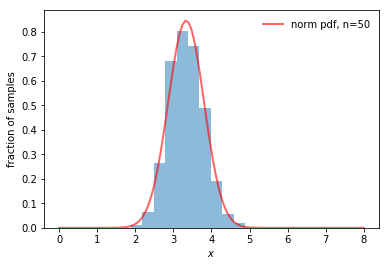

In [7]:
n = 50
lst = [] # В этот пустой список будут записываться средние значения по n выборкам
for _ in range(1000):
    r1 = expon.rvs(size=n, scale = lmbd**-1)
    m = mean(r1)
    lst.append(m)

# Используя информацию о среднем и дисперсии экспоненциального распределения, 
# определяем значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, 
# приближается распределение выборочных средних

std = np.sqrt((lmbd**-2)/n) 
norm_mean = lmbd**-1 

x = np.linspace(0, 8, 100)
norm_rv = norm(norm_mean, std)
plt.plot(x, norm_rv.pdf(x),'r-', lw=2, alpha=0.6, label='norm pdf, n=50')

plt.hist(lst, density=True, histtype='stepfilled', alpha=0.5)
plt.legend(loc='best', frameon=False)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.show()

Аналогично для n = 100

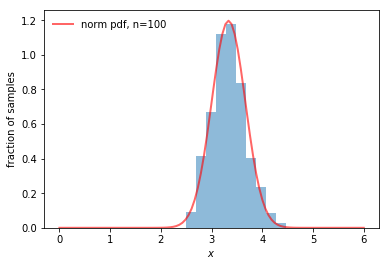

In [6]:
n = 100
lst = [] # В этот пустой список будут записываться средние значения по n выборкам
for _ in range(1000):
    r1 = expon.rvs(size=n, scale = lmbd**-1)
    m = mean(r1)
    lst.append(m)

# Используя информацию о среднем и дисперсии экспоненциального распределения, 
# определяем значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, 
# приближается распределение выборочных средних

std = np.sqrt((lmbd**-2)/n) 
norm_mean = lmbd**-1 

x = np.linspace(0, 6, 100)
norm_rv = norm(norm_mean, std)
plt.plot(x, norm_rv.pdf(x),'r-', lw=2, alpha=0.6, label='norm pdf, n=100')

plt.hist(lst, density=True, histtype='stepfilled', alpha=0.5)
plt.legend(loc='best', frameon=False)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.show()

Центральная предельная теорема утверждает, что сумма n независимых одинаково распределенных случайных величин имеет распределение, близкое к нормальному.
В результате исследования распределения средних значений 10, 50, 100 экспоненциальных случайных величин было показано, что исследуемое распределение приближается к нормальному распределению при увеличении размера выборки.